# Quick Start
In this notebook, we show you how to get started with the simulator.

To install the simulator, please follow the [install instructions](https://elucherini.github.io/t-recs/readme.html#installation) in the docs.

## Import the library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import trecs
from trecs.models import SocialFiltering
from trecs.metrics import InteractionMeasurement, MSEMeasurement

## Instantiate a model
For example, here we use the social filtering recommender system, which recommends items based on users' social network.

In [2]:
sf = SocialFiltering()

## Add a metric to measure during the simulation
In this example, we collect information about the number of users who interacted with each item.

In [3]:
sf.add_metrics(InteractionMeasurement(), MSEMeasurement())

## Run the model for a number of time steps
For example, here we run it for 5 time steps to keep the output small.

In [4]:
sf.run(timesteps=5)

100%|██████████| 5/5 [00:00<00:00,  8.71it/s]


## Collect the results
The following returns a dictionary of measurements taken **before the beginning of the simulation** and **at each time step of the simulation**. We obtain measurements for the metrics we've added (InteractionMeasurement) and all the other default metrics in the model (in this case, the MSE between the predicted user preferences and the real user preferences).

In [5]:
results = sf.get_measurements()
results.keys()

dict_keys(['interaction_histogram', 'mse', 'timesteps'])

## Plot or view data
The interaction histograms are lists of interactions aggregated by item (i.e., the `i`-th element of histogram `histogram[t]` is the number of interactions received by item `i` at timestep `t`).

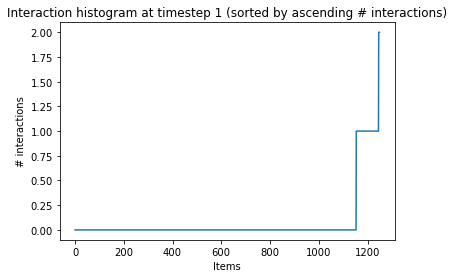

In [6]:
timestep = 1
plt.plot(np.arange(sf.num_items), sorted(results['interaction_histogram'][timestep]))
plt.title("Interaction histogram at timestep %d (sorted by ascending # interactions)" % timestep)
plt.xlabel("Items")
plt.ylabel("# interactions")
plt.show()

In [7]:
pd.DataFrame({'mse': results['mse'], 'timesteps': results['timesteps']})

,mse,timesteps
0,NaN,0
1,0.000824,1
2,0.003450,2
3,0.020450,3
4,0.069455,4
5,0.164688,5


(**Note:** The first element in a measurement is often `None` because its value is undefined before running the simulation. For example, MSE makes no sense before the model has made predictions on user preferences.)

## More info
Have a look at the following Notebooks:
1. [Structural Virality](structural-virality.ipynb)
2. [Complete guide](complete-guide.ipynb)
3. [Advanced guide: metrics](advanced-metrics.ipynb)
4. [Advanced guide: models](advanced-models.ipynb)

Please read the [documentation](https://elucherini.github.io/algo-segregation/index.html) for more details.